# Takers or givers? geeks on an online forum

![banner](https://entelisplus.entelis.net/wp-content/uploads/2020/12/4575-scaled.jpg)

## Abstract

We look into Hacker News, an online forum for computer science aficionados, in order to investigate interactive posts about 1. community questions "Ask HN" and 2. expositions "Show HN". We find out:
* on average, 'Ask' receives more comments (medians: 2x0)
* on average, 'Ask' receives more points: (medians: 3x3, but higher mean in "Ask")
* most common hour for posting on average: at 16 hours.
* best time for scoring more points on a post: at 12 hours (max=16.3, min=13.3);
* best time for getting more comments on a post: at 12 hours (max=7.2, min=5.8);
* comparing interactive posts vs. others: interactive posts receive both more comments(medians: 1x0) and more points(medians: 3x2);


## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals and limitations**](#section2)
3. [**Methodology**](#section3)
4. [**Metadata**](#section4)
5. [**Data Exploration**](#section5)   
6. [**Data Cleaning and transformation**](#section6)    
7. [**Data Visualization and Analysis**](#section7)
8. [**Conclusion**](#section8)

## 1. Introduction<a name="section1"></a>

Hacker News is a social news website focusing on computer science and entrepeneurship. It was started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result. These characteristics make the website a thermometer for the computer science community, a valuable source of insights into the current trends in the field.

## 2. Goals and Limitations<a name="section2"></a>

Looking at post categories up until september 2016 with the interactive titles "Ask HN" - asking the community a specific question- or "Show HN" - i.g. publicizing a product or project-, we will investigate: 
* 1. if 'show' or 'ask' posts receive more comments on average;
* 2. if show or ask posts receive more points on average;
* 3. most common hour for posting on average;
* 4. best time for scoring more points on a post;
* 5. best time for getting more comments on a post;
* 6. Looking at 3,4,5, which group is nearer to its maximum potential: the data of interest(interactive posts) or the rest of the posts?

Our limitations are:

* Low number of variables in the dataset limits insights

## 3. Methodology <a name="section3"></a>

We will proceed to analyze the data with regular expressions, pandas, numpy and datetime libraries, trying to manipulate strings and spot patterns with the aid of visualization tools (seaborn heatmaps, matplotlib boxplots, barplots).

## 4. Metadata<a name="section4"></a>

Our dataset can be found [here](https://www.kaggle.com/datasets/hacker-news/hacker-news-posts), containing over 300 thousand entries by 7 columns.

Below are descriptions of the columns:

* id: the unique identifier from Hacker News for the post
* title: the title of the post
* url: the URL that the posts links to, if the post has a URL
* num_points: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
* num_comments: the number of comments on the post
* author: the username of the person who submitted the post
* created_at: the date and time of the post's submission

## 5. Data Exploration<a name="section5"></a>

In this step, we will fetch the data as panda dataframes and check for data integrity and conformity:
* (1): Check for data type;
* (2): missing/repeated data
* (3): most common qualifiers;
* (4): unwanted columns and reasonableness

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from csv import reader

plt.style.use('fivethirtyeight')
sns.set(style='darkgrid')

hn=pd.read_csv('HN_posts_year_to_Sep_26_2016.csv')

In [2]:
#(1) Check for data type:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            293119 non-null  int64 
 1   title         293119 non-null  object
 2   url           279256 non-null  object
 3   num_points    293119 non-null  int64 
 4   num_comments  293119 non-null  int64 
 5   author        293119 non-null  object
 6   created_at    293119 non-null  object
dtypes: int64(3), object(4)
memory usage: 15.7+ MB


Most columns are correct, but we should expect the last column to be a datetime object.

In [3]:
#(1) Check for data type:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


In [4]:
#(2) check for missing/repeated data
hn.describe(include='all')

,id,title,url,num_points,num_comments,author,created_at
count,2.931190e+05,293119,279256,293119.000000,293119.000000,293119,293119
unique,NaN,269452,247602,NaN,NaN,51900,215563
top,NaN,On the reception and detection of pseudo-profo...,http://www.aioptify.com/topmldmbooks.php?utm_s...,NaN,NaN,jonbaer,4/9/2016 22:40
freq,NaN,15,22,NaN,NaN,2731,11
mean,1.133046e+07,NaN,NaN,15.025324,6.525544,NaN,NaN
std,6.961055e+05,NaN,NaN,58.504103,30.376319,NaN,NaN
min,1.017690e+07,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,1.071636e+07,NaN,NaN,1.000000,0.000000,NaN,NaN
50%,1.130303e+07,NaN,NaN,2.000000,0.000000,NaN,NaN
75%,1.193152e+07,NaN,NaN,4.000000,1.000000,NaN,NaN


Interesting to notice that the most repeated title is not as frequent as the most repeated url, which might indicate some columns are filled wrongly.

Text(0.5, 0.7093749999999819, 'Columns')

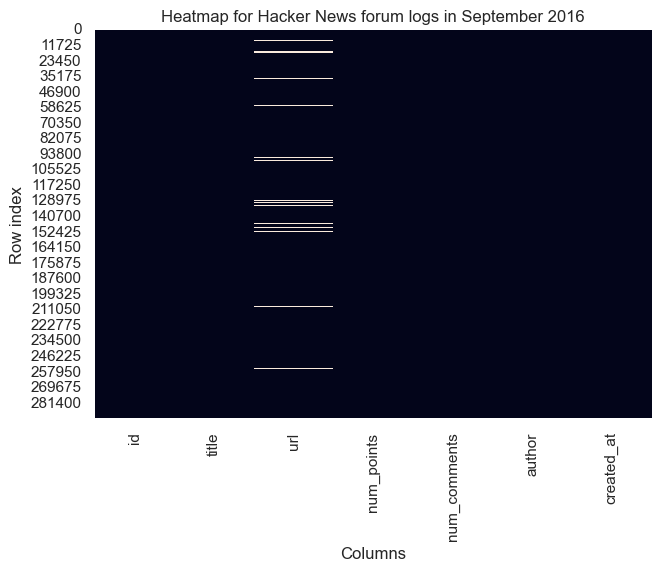

In [5]:
#(2)check for missing/repeated data
sns.heatmap(hn.isnull(), cbar=False)
plt.title('Heatmap for Hacker News forum logs in September 2016')
plt.ylabel('Row index')
plt.xlabel('Columns')

We can confirm from our heatmap that the only missing data is in the url column, as all others are solidly complete.

In [6]:
#(2) missing/repeated data: how many fully duplicated rows
dupplicates_hn = hn.duplicated()
hn[dupplicates_hn]

,id,title,url,num_points,num_comments,author,created_at


There are no fully repeated rows, nor duplicated id values.

In [7]:
#(2) missing/repeated data: duplicated 'id' values
duplicates_id = hn.duplicated('id')
hn[duplicates_id]['id'].value_counts(ascending=False)

Series([], Name: id, dtype: int64)

In [8]:
#(2) missing/repeated data: duplicated 'title' values
duplicates_title = hn.duplicated('title')
hn[duplicates_title]['title'].value_counts(ascending=False)

Employee benefits at Basecamp                                                       14
On the reception and detection of pseudo-profound bullshit [pdf]                    14
Unwinding Ubers Most Efficient Service                                              14
How Zano Raised Millions on Kickstarter and Left Most Backers with Nothing          11
How I got a game on the Steam Store without anyone from Valve ever looking at it    11
                                                                                    ..
Apache Beam: Next Step in Big Data Unification                                       1
System Overload                                                                      1
The End of the American Empire                                                       1
A cultural history looks at how word processing changed the way we write             1
Time Cube is gone                                                                    1
Name: title, Length: 17784, dtype: int64

In [9]:
#(2) missing/repeated data: duplicated 'title' values
hn[hn['title']=='Employee benefits at Basecamp'].head()

,id,title,url,num_points,num_comments,author,created_at
46362,12165634,Employee benefits at Basecamp,https://m.signalvnoise.com/employee-benefits-a...,105,62,antouank,7/26/2016 14:00
109468,11617288,Employee benefits at Basecamp,https://m.signalvnoise.com/employee-benefits-a...,2,0,simonebrunozzi,5/3/2016 2:02
155789,11228488,Employee benefits at Basecamp,https://m.signalvnoise.com/employee-benefits-a...,10,0,lobo_tuerto,3/5/2016 5:01
166460,11145562,Employee benefits at Basecamp,https://m.signalvnoise.com/employee-benefits-a...,2,0,vbv,2/21/2016 17:58
198685,10892603,Employee benefits at Basecamp,https://m.signalvnoise.com/employee-benefits-a...,2,0,prawn,1/13/2016 6:13


Apparently there are repeated titles from different users created at unrelated times, probably because they didn't bother checking if their topic already existed.

In [10]:
#(2) missing/repeated data: duplicated 'title' values
ask_mask=hn[duplicates_title]['title'].str.contains(r'^Ask|Show HN', flags=re.I)
hn[duplicates_title][ask_mask]

,id,title,url,num_points,num_comments,author,created_at
3187,12548823,Show HN: Doctest the lightest C++ testing fra...,NaN,7,0,onqtam,9/21/2016 15:06
4522,12538002,Ask HN: Do you have any experience with burnin...,NaN,1,0,thomas4567,9/20/2016 8:32
4992,12533650,Show HN: Inside The network of email newsletters,http://inside.com,4,0,awwstn,9/19/2016 18:40
6161,12523053,Show HN: SpaceNeovim Spacemacs for Neovim,NaN,24,2,Tehnix,9/17/2016 23:21
6822,12516156,Show HN: Phineas build realtime apps with Dyn...,https://gist.github.com/jatins/11aac836f252571...,4,0,jatins,9/16/2016 18:28
...,...,...,...,...,...,...,...
284951,10233459,Ask HN: What are your favorite podcasts?,NaN,2,2,rayalez,9/17/2015 14:19
284952,10233458,Show HN: Promise Visualization Playground,http://bevacqua.github.io/promisees/,4,0,bevacqua,9/17/2015 14:19
286574,10221558,Ask HN: What type of apps would you use on the...,NaN,2,0,mnort9,9/15/2015 16:31
290955,10191611,Show HN: AllcountJS Framework for application...,https://github.com/allcount/allcountjs,1,0,pavel_tiunov,9/9/2015 14:25


So there are 288 repeated entries for "Ask HN" or "Show HN" posts. However, they are not perfect replicas, but rather seem like reposting from users who didn't check for similar topics previously.

In [11]:
#(2) missing/repeated data: duplicated 'url' values
duplicates_url = hn.duplicated('url')
hn[duplicates_title]['url'].value_counts(ascending=False)

http://journal.sjdm.org/15/15923a/jdm15923a.pdf                                                                                         14
http://www.technologyreview.com/view/542626/why-self-driving-cars-must-be-programmed-to-kill/                                           11
https://github.com/iphone5solo/PYPhotoBrowser                                                                                           11
https://medium.com/@buckhx/unwinding-uber-s-most-efficient-service-406413c5871d                                                         10
https://www.enki.com                                                                                                                     9
                                                                                                                                        ..
https://medium.com/the-coinbase-blog/how-coinbase-builds-secure-infrastructure-to-store-bitcoin-in-the-cloud-30a6504e40ba#.5uacqjd2c     1
http://youtubecreator.blogs

In [12]:
#(2) missing/repeated data: duplicated 'url' values
hn[hn['title']=='Employee benefits at Basecamp']['url'].value_counts()

https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58                    3
https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58#.15drxex98         1
https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58#.ozale2pdg         1
https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58#.udqt7mwgj         1
https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58#.xyyp9nvka         1
https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58#.rr327rjb9         1
https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58#.b4wr13aqo         1
https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58#.9n9bk7iwu         1
https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58#.6y98rrend         1
https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58#.b3h5bv71t         1
https://m.signalvnoise.com/employee-benefits-at-basecamp-d2d46fd06c58?gi=9086eae21bba    1

So even though the same title can be repeated more than once, depending on who posts it, the url can be slightly different. Therefore, url doesn't help us at all to filter for repeated/unwanted values.

In [13]:
#(3) most common qualifiers: how many 'Ask HN' posts are there
hn[hn['title'].str.contains(r'^Ask HN', flags=re.I)]

,id,title,url,num_points,num_comments,author,created_at
10,12578908,Ask HN: What TLD do you use for local developm...,NaN,4,7,Sevrene,9/26/2016 2:53
42,12578522,Ask HN: How do you pass on your work when you ...,NaN,6,3,PascLeRasc,9/26/2016 1:17
76,12577908,Ask HN: How a DNS problem can be limited to a ...,NaN,1,0,kuon,9/25/2016 22:57
80,12577870,Ask HN: Why join a fund when you can be an angel?,NaN,1,3,anthony_james,9/25/2016 22:48
102,12577647,Ask HN: Someone uses stock trading as passive ...,NaN,5,2,00taffe,9/25/2016 21:50
...,...,...,...,...,...,...,...
293047,10177359,Ask HN: Is coursera specialization in product ...,NaN,1,0,pipipzz,9/6/2015 11:27
293052,10177317,Ask HN: Any meteor devs out there who could sp...,NaN,2,1,louisswiss,9/6/2015 10:52
293055,10177309,Ask HN: Any recommendations for books about ra...,NaN,2,4,rationalthrowa,9/6/2015 10:46
293073,10177200,Ask HN: Where do you look for work if you need...,NaN,14,20,coroutines,9/6/2015 9:36


In [14]:
#(3) most common qualifiers: how many 'Show HN' posts are there
hn[hn['title'].str.contains(r'^Show HN', flags=re.I)]

,id,title,url,num_points,num_comments,author,created_at
52,12578335,Show HN: Finding puns computationally,http://puns.samueltaylor.org/,2,0,saamm,9/26/2016 0:36
58,12578182,Show HN: A simple library for complicated anim...,https://christinecha.github.io/choreographer-js/,1,0,christinecha,9/26/2016 0:01
64,12578098,Show HN: WebGL visualization of DNA sequences,http://grondilu.github.io/dna.html,1,0,grondilu,9/25/2016 23:44
70,12577991,"Show HN: Pomodoro-centric, heirarchical projec...",https://github.com/jakebian/zeal,2,0,dbranes,9/25/2016 23:17
140,12577142,Show HN: Jumble Essays on the go #PaulInYourP...,https://itunes.apple.com/us/app/jumble-find-st...,1,1,ryderj,9/25/2016 20:06
...,...,...,...,...,...,...,...
292995,10177714,Show HN: Repartee The SMS Messaging Stack for...,https://github.com/markgreenall/Repartee,2,0,Nuratu,9/6/2015 14:21
293002,10177631,Show HN: Immutable and type-checked state and ...,https://github.com/gcanti/redux-tcomb,20,2,gcanti,9/6/2015 13:50
293019,10177511,Show HN: MockTheClock A tiny JavaScript libra...,https://github.com/zb3/MockTheClock,18,6,zb3,9/6/2015 13:02
293028,10177459,Show HN: AppyPaper Gift wrap with app icons p...,http://www.appypaper.com/,6,4,submitstartup,9/6/2015 12:38


There are 9k 'Ask HN' posts, and 10k 'Show HN' posts, or approximately 3.5% of all posts, each.

In [15]:
#(3) Most common qualifiers: most popular posts by comments
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(hn.sort_values(by='num_comments', ascending=False).head(100))


,id,title,url,num_points,num_comments,author,created_at
69169,11966167,UK votes to leave EU,http://www.bbc.co.uk/news/uk-politics-36615028,3125,2531,dmmalam,6/24/2016 3:48
14083,12445994,iPhone 7,http://www.apple.com/iPhone7,756,1733,benigeri,9/7/2016 18:52
87442,11807450,Moving Forward on Basic Income,http://blog.ycombinator.com/moving-forward-on-...,1330,1448,dwaxe,5/31/2016 16:20
186965,10982340,Request For Research: Basic Income,https://blog.ycombinator.com/basic-income,1876,1120,mattkrisiloff,1/27/2016 19:23
86558,11814828,Ask HN: Who is hiring? (June 2016),NaN,644,1007,whoishiring,6/1/2016 15:01
178526,11049067,GitHub is undergoing a full-blown overhaul as ...,http://www.businessinsider.com/github-the-full...,808,973,easyd,2/6/2016 18:43
170017,11116274,A Message to Our Customers,http://www.apple.com/customer-letter/,5771,967,epaga,2/17/2016 8:38
42275,12202865,Ask HN: Who is hiring? (August 2016),NaN,534,947,whoishiring,8/1/2016 15:01
109928,11611867,Ask HN: Who is hiring? (May 2016),NaN,553,937,whoishiring,5/2/2016 15:01
18411,12405698,Ask HN: Who is hiring? (September 2016),NaN,521,910,whoishiring,9/1/2016 15:00


The 5 most commented posts are above the 1000 comments mark, and 3 of them seem to be about political news, which is funny because that is prohibited by the forum. Among the top 100 posts, many "Ask HN", not a single one "Show HN".

In [16]:
#(3) Most common qualifiers: most popular posts by points
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(hn.sort_values(by='num_points', ascending=False).head(100))

,id,title,url,num_points,num_comments,author,created_at
170017,11116274,A Message to Our Customers,http://www.apple.com/customer-letter/,5771,967,epaga,2/17/2016 8:38
69169,11966167,UK votes to leave EU,http://www.bbc.co.uk/news/uk-politics-36615028,3125,2531,dmmalam,6/24/2016 3:48
9263,12494998,Pardon Snowden,https://www.pardonsnowden.org/,2553,781,erlend_sh,9/14/2016 8:31
57128,12073675,Tell HN: New features and a moderator,NaN,2381,451,dang,7/11/2016 19:34
136284,11390545,Ubuntu on Windows,http://blog.dustinkirkland.com/2016/03/ubuntu-...,2049,513,bpierre,3/30/2016 16:35
77812,11893153,Microsoft to acquire LinkedIn for $26B,http://news.microsoft.com/2016/06/13/microsoft...,2049,831,whatok,6/13/2016 12:34
174476,11080701,"Physicists Detect Gravitational Waves, Proving...",http://www.nytimes.com/2016/02/12/science/ligo...,2011,483,intull,2/11/2016 15:37
285866,10226196,14-Year-Old Boy Arrested for Bringing Homemade...,http://techcrunch.com/2015/09/16/14-year-old-b...,1952,870,ahmad19526,9/16/2015 13:00
186965,10982340,Request For Research: Basic Income,https://blog.ycombinator.com/basic-income,1876,1120,mattkrisiloff,1/27/2016 19:23
49668,12136578,Why Im Suing the US Government,https://www.bunniestudios.com/blog/?p=4782,1855,305,ivank,7/21/2016 13:10


In [17]:
#(3) Most common qualifiers: titles in both top100 lists for points and comments
hn.sort_values(by='num_points', ascending=False)['title'].head(100).isin(hn.sort_values(by='num_comments', ascending=False)['title'].head(100)).sum() 

29

Interestingly, in the top 100 posts by points, there is a handful of Show HN, but no Ask HN posts. Out of the 100 most popular by points and comments, 29 posts are shown in both lists.

In [18]:
#(3) Most common qualifiers: most frequent authors
hn['author'].value_counts(ascending=False)

jonbaer            2731
ingve              2487
prostoalex         1656
dnetesn            1517
jseliger           1382
                   ... 
johnx123-up           1
data_juggernaut       1
ympavan               1
nurkhz                1
ggillas               1
Name: author, Length: 51900, dtype: int64

In [19]:
#(3) Most common qualifiers: most frequent authors
hn['author'].value_counts()[hn['author'].value_counts().values>10]

jonbaer          2731
ingve            2487
prostoalex       1656
dnetesn          1517
jseliger         1382
                 ... 
uyasinov           11
nebulon            11
Symmetry           11
contingencies      11
LukasReschke       11
Name: author, Length: 4411, dtype: int64

In [20]:
np.median(list(hn['author'].value_counts().values))

1.0

It is a very active community, with over 4k users posting over 10 times. There are 51900 different post authors, 25290 authors that posted more than once, and this sample group of authors can be represented by its median: 1 post each.

In [21]:
#(4) Unwanted columns/rows and reasonableness: 
three_ascii_mask = hn['title'].str.count(r'[^\x00-\x7F]').gt(3)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(hn[three_ascii_mask])

,id,title,url,num_points,num_comments,author,created_at
704,12571495,How some French companies reward long-term sha...,http://jpkoning.blogspot.com/2016/09/the-frenc...,2,0,mrb,9/24/2016 16:23
1342,12565423,Disgraced trader Jerome Kerviel damages slashe...,http://www.independent.co.uk/news/business/new...,1,0,wimgz,9/23/2016 15:40
6820,12516164,GOTO 2016 Â a Practical Guide to Container Sc...,https://www.youtube.com/watch?v=hmB8GP5-cMg,1,0,dkarapetyan,9/16/2016 18:28
7894,12506752,"A Primer on BÃ©zier Curves, Â§39: B-Splines",https://pomax.github.io/bezierinfo/#bsplines,2,1,TheRealPomax,9/15/2016 15:05
10137,12486921,Â0 to Â84k as a First-Time Consultant: Heres...,https://www.reddit.com/r/Entrepreneur/comments...,1,0,gresquare,9/13/2016 10:53
12056,12468326,GOTO 2016 Â Want to Be a Better Programmer? Â...,https://www.youtube.com/watch?v=P8ltWIqDPzo,4,0,laithshadeed,9/10/2016 8:41
13941,12448194,StÃ©ganÃ´: an original Python Steganography mo...,https://github.com/cedricbonhomme/Stegano,4,0,cedricbonhomme,9/7/2016 21:56
16690,12423434,Show HN: PokÃ©Moves Live Camera Filter for Po...,https://itunes.apple.com/us/app/pokemoves-live...,1,0,longsangstan,9/4/2016 8:54
20540,12388517,GOTO 2016 Â JavaScript Performance Through th...,https://www.youtube.com/watch?v=r76ZjdzFExg,1,0,tambourine_man,8/30/2016 9:25
20956,12384837,Â«BafflingÂ» Â«signalÂ» Â«from HD 164595Â» is ...,http://setiathome.berkeley.edu/forum_thread.ph...,3,0,okket,8/29/2016 20:02


There are 121, or less than 0.05% of rows containing 3 or more non-Ascii characters, which usually indicates foreign language, or characters we can't easily undesrtand. Here, however, most titles are inteligible, so keeping them seems to be the better choice for now.

The website column could have been interesting to check for inconsistencies, but at the end of the day, it really proved itself disposable.

## 6. Data Cleaning and Transformation<a name="section6"></a>

Based on previous data outlook, we will:
* (1) Datatypes: convert 'created_at' to datetime;
* (2) Duplicated/missing: The missing data is only in the column that will be deleted, 'url', so nothing to worry about here. We will keep the duplicated, as they have proved not to be perfect replicas but rather entries by different users.
* (3) unwanted columns/rows: remove the 'url' column

In [22]:
# (1) Datatypes: convert 'created_at' to datetime
hn['created_at']=pd.to_datetime(hn['created_at'])
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            293119 non-null  int64         
 1   title         293119 non-null  object        
 2   url           279256 non-null  object        
 3   num_points    293119 non-null  int64         
 4   num_comments  293119 non-null  int64         
 5   author        293119 non-null  object        
 6   created_at    293119 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 15.7+ MB


In [23]:
hn['created_at']

0        2016-09-26 03:26:00
1        2016-09-26 03:24:00
2        2016-09-26 03:19:00
3        2016-09-26 03:16:00
4        2016-09-26 03:14:00
                 ...        
293114   2015-09-06 06:02:00
293115   2015-09-06 06:01:00
293116   2015-09-06 05:56:00
293117   2015-09-06 05:55:00
293118   2015-09-06 05:50:00
Name: created_at, Length: 293119, dtype: datetime64[ns]

In [24]:
#(2) and (3): remove 'url'
hn_ready=hn.drop(['url'], axis=1)
hn_ready.columns

Index(['id', 'title', 'num_points', 'num_comments', 'author', 'created_at'], dtype='object')

## 7. Data Visualizations and Analysis<a name="section7"></a>

Looking back at the project questions: 

* 1. if 'show' or 'ask' posts receive more comments on average;
* 2. if show or ask posts receive more points on average;
* 3. most common hour for posting;
* 4. best time for scoring more points on a post;
* 5. best time for getting more comments on a post;
* 6. compare interactive posts vs. comments and points other posts receive;

(0.0, 10.0)

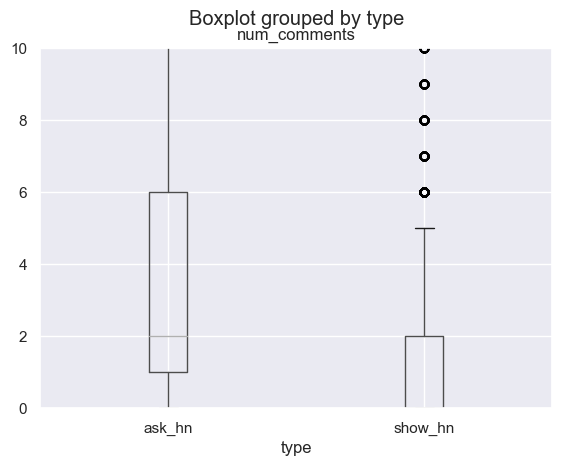

In [25]:
# 1. if 'show' or 'ask' posts receive more comments on average;
#- Here, we group our our data by title, and compare them by median.
show_hn = hn_ready.copy()[hn_ready['title'].str.contains(r'^Show HN', flags=re.I)]
ask_hn=hn_ready.copy()[hn_ready['title'].str.contains(r'^Ask HN', flags=re.I)]
show_hn['type']='show_hn'
ask_hn['type']='ask_hn'
interest_data = pd.concat([ask_hn, show_hn])
interest_data.boxplot(column='num_comments', by='type')
plt.ylim([0,10])

As the most representative average(median) shows, "Ask HN" posts receive more comments on average.

(0.0, 10.0)

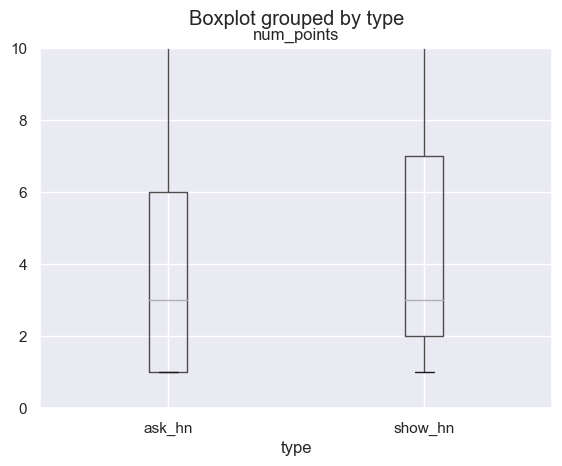

In [26]:
#* 2. if show or ask posts receive more points on average;
#- Here, we group our our data by title, and compare them by median.
pd.concat([ask_hn, show_hn]).boxplot(column='num_points', by='type')
plt.ylim([0,10])

In [27]:
#2- As a tie-breaker, we group our our data by title, and compare them by mean
ask_hn['num_points'].mean()

11.31174089068826

In [28]:
#2- As a tie-breaker, we group our our data by title, and compare them by mean
show_hn['num_points'].mean()

14.843571569206537

Both posts for 'Ask' and 'Show' have a median of 3 points, but show_hn has a higher mean of 14 comments vs 11 from 'Ask'.

Text(0.5, 0, 'Hour of the day')

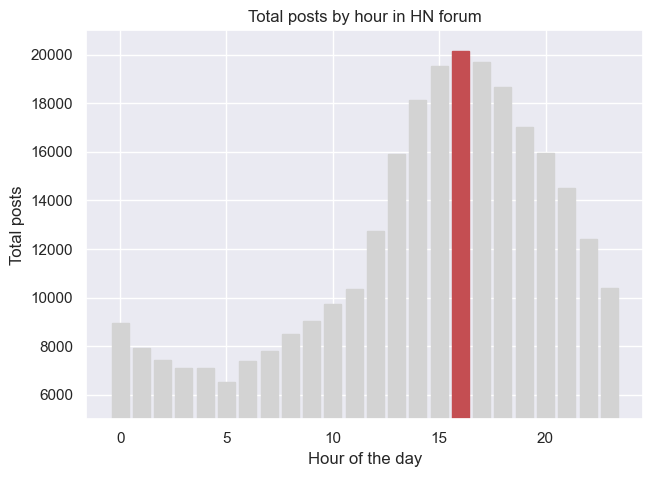

In [29]:
#* 3 most common hour for posting;
#- Here, we group the data around the hour objects within each datetime value and compare their counts

hn['hour']=hn['created_at'].dt.hour
series = hn['hour'].value_counts().sort_index()
barlist = plt.bar(series.index, series.values)
for i in range(24):
    barlist[i].set_color('lightgray')
barlist[16].set_color('r')
plt.title('Total posts by hour in HN forum')
plt.ylabel('Total posts')
plt.ylim([5000,21000])
plt.xlabel('Hour of the day')

The total posts frequency by daily hours is a senoid-like chart, peaking at 16 hours.

In [30]:
series2 = hn.pivot_table(values='num_points', index='hour', aggfunc='mean').reset_index(drop=True).squeeze(axis=1)
series2

0     15.879906
1     15.555303
2     16.406170
3     15.010244
4     15.403210
5     15.375918
6     14.750407
7     14.740000
8     14.941080
9     14.499006
10    15.034617
11    16.192910
12    16.785927
13    16.109430
14    14.051935
15    14.757951
16    14.509668
17    14.987266
18    15.279771
19    15.362623
20    13.607835
21    14.580325
22    14.127970
23    14.504527
Name: num_points, dtype: float64

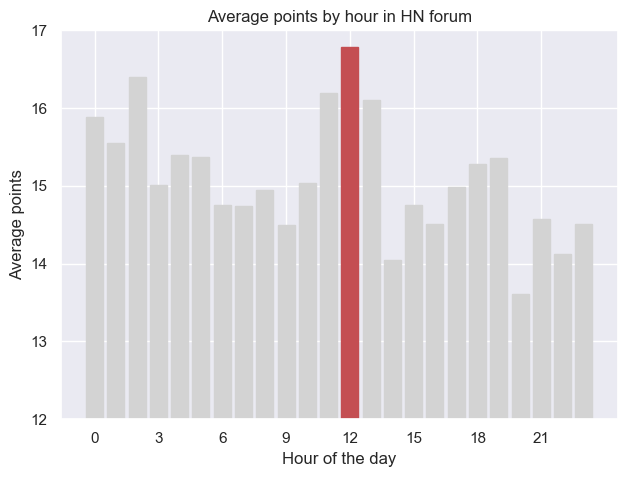

In [31]:
# 4. best posting time for scoring more points;
#- Here, we group our data by hour objects within each datetime value and compare their points

series2 = hn.pivot_table(values='num_points', index='hour', aggfunc='mean').reset_index(drop=True).squeeze(axis=1)
table = plt.bar(series2.index, series2.values)
for i in range(24):
    table[i].set_color('lightgray')
table[12].set_color('r')
plt.title('Average points by hour in HN forum')
plt.ylabel('Average points')
plt.ylim([12,17])
plt.xlabel('Hour of the day')
plt.xticks([0,3,6,9,12,15,18,21])
plt.show()

On average, the best time to post for points is at noon, followed by 2am.

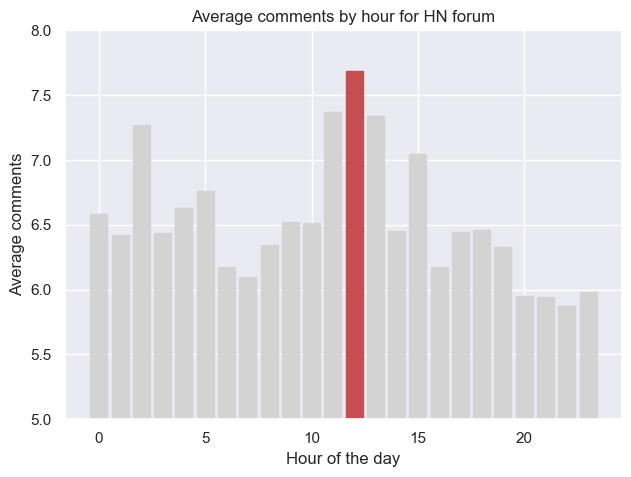

In [32]:
# 5. best posting time for getting more comments;
#- Here, we group our data by hour objects within each datetime value and compare their comments
series3 = hn.pivot_table(values='num_comments', index='hour', aggfunc='mean').reset_index(drop=True).squeeze(axis=1)
table2 = plt.bar(series3.index, series3.values)
for i in range(24):
    table2[i].set_color('lightgray')
table2[12].set_color('r')

plt.title('Average comments by hour for HN forum')
plt.ylabel('Average comments')
plt.ylim([5,8])
plt.xlabel('Hour of the day')
plt.show()

On average, the best time to post for comments is at 12 hours, closely followed by 11 and 13.(max=7.5, min=5.8).

(0.0, 10.0)

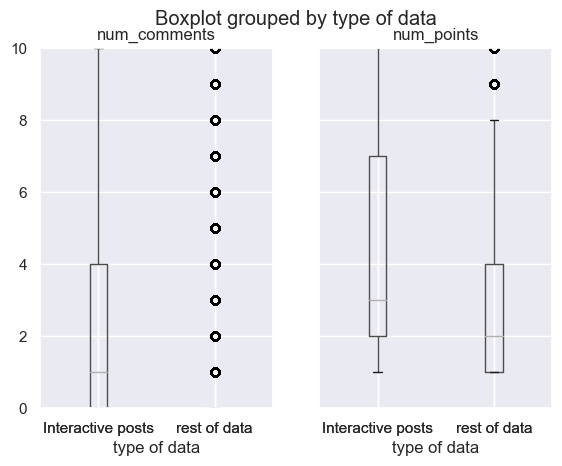

In [33]:
#* 6. compare interactive posts vs.  rest of posts: comments and points;
#- here, we merge our "Ask" and "show" entries and compare their average performance against 
# the rest of the dataset.

uninterest_data = hn_ready.copy()[~hn_ready['title'].isin(interest_data['title'])]
uninterest_data['type of data']='rest of data'
interest_data['type of data']='Interactive posts'
reunited = pd.concat([interest_data, uninterest_data])
reunited.boxplot(column= ['num_comments','num_points'], by='type of data')
plt.ylim([0,10])

As shown in the boxplots above, the data of interest ("Ask HN" or "Show HN") performs better both in post points (3x2) and comments (1x0), according to their medians. 

## 8. Conclusion<a name="section8"></a>

In this project, we investigated the general stats on the most interactive post topics to the online community: "Ask HN" and "Show HN". We looked for repeated/missing data as well as inteligible titles, but this dataset proved to be really solid, exception made for the 'url' column which is disposable in our analysis. 

The summary of the findings are:
* 1. if 'show' or 'ask' posts receive more comments on average: 'Ask' (medians: 2x0)
* 2. if show or ask posts receive more points on average: 'Ask': (medians: 3x3, but higher mean in "Ask")
* 3. most common hour for posting on average: the total post by hour frequency chart show a senoid peaking at 16 hours.
* 4. best time for scoring more points on a post: at 12 hours, by a slight margin (max=16.3, min=13.3);
* 5. best time for getting more comments on a post: at 12 hours, by a slight margin (max=7.2, min=5.8);
* 6. compare interactive posts vs. comments and points other posts receive: interactive posts receive both more comments(medians: 1x0) and more points(medians: 3x2);

It is a simple exercise, and the low number of variables tabled limit our scope to further investigations at the time of this writing.